<a href="https://colab.research.google.com/github/metehanunal0/Machine-Learning-Applications/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('veriler.csv')
df.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [ ]:
df.describe().round()

,boy,kilo,yas
count,22.0,22.0,22.0
mean,163.0,62.0,29.0
std,21.0,22.0,13.0
min,125.0,30.0,9.0
25%,156.0,42.0,22.0
50%,166.0,60.0,28.0
75%,179.0,80.0,38.0
max,193.0,105.0,55.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='boy'>

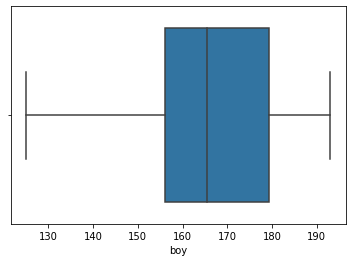

In [ ]:
sns.boxplot(df['boy'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kilo'>

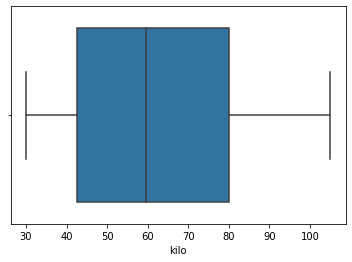

In [ ]:
sns.boxplot(df['kilo'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yas'>

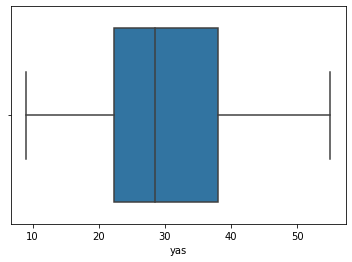

In [ ]:
sns.boxplot(df['yas'])

<AxesSubplot:>

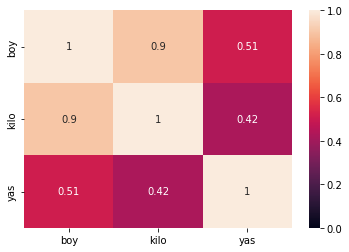

In [ ]:
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

# Encoding DataFrame

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.dtypes

ulke        object
boy          int64
kilo         int64
yas          int64
cinsiyet    object
dtype: object

In [ ]:
df["ulke"].unique()

array(['tr', 'us', 'fr'], dtype=object)

In [ ]:
df["cinsiyet"].unique()

array(['e', 'k'], dtype=object)

In [ ]:
ohe = OneHotEncoder() # assigning an object from OneHotEncoder class

In [ ]:
ohe.fit_transform(df[["ulke","cinsiyet"]]).toarray()  # performs encoding in order to get rid of string values

array([[0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [ ]:
encoded_array = ohe.fit_transform(df[["ulke","cinsiyet"]]).toarray()

In [ ]:
encoded_labels = ohe.categories_ # assigning label names in order to paste new features array

In [ ]:
np.hstack(encoded_labels).ravel() # gathering all labels around in one array

array(['fr', 'tr', 'us', 'e', 'k'], dtype=object)

In [ ]:
encoded_labels = np.hstack(encoded_labels).ravel()


In [ ]:
print(encoded_labels) # feature's labels are ready to go!

['fr' 'tr' 'us' 'e' 'k']


In [ ]:
pd.DataFrame(encoded_array, columns = encoded_labels).tail() # creating dataframe with encoded features

,fr,tr,us,e,k
17,1.0,0.0,0.0,1.0,0.0
18,1.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,0.0,1.0
20,1.0,0.0,0.0,0.0,1.0
21,1.0,0.0,0.0,0.0,1.0


In [ ]:
encdf = pd.DataFrame(encoded_array, columns = encoded_labels) # creating new dataframe as encdf which means encoded df

In [ ]:
encdf.sample(n=5)

,fr,tr,us,e,k
17,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0
13,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
18,1.0,0.0,0.0,1.0,0.0


In [ ]:
pd.concat([df, encdf], axis=1).sample(n=4) # concatinating encoded df and main df so that we obtain main df, where we use model at.

,ulke,boy,kilo,yas,cinsiyet,fr,tr,us,e,k
9,us,185,105,33,e,0.0,0.0,1.0,1.0,0.0
17,fr,187,80,27,e,1.0,0.0,0.0,1.0,0.0
4,tr,129,38,12,e,0.0,1.0,0.0,1.0,0.0
1,tr,125,36,11,e,0.0,1.0,0.0,1.0,0.0


In [ ]:
alldf = pd.concat([df, encdf], axis=1)

In [ ]:
# ***** drop columns that we no longer need so that we use dummy encoded array ***** #
modeldf = alldf.drop(['ulke', 'cinsiyet'], axis=1, inplace=False)
modeldf.tail()

,boy,kilo,yas,fr,tr,us,e,k
17,187,80,27,1.0,0.0,0.0,1.0,0.0
18,183,88,28,1.0,0.0,0.0,1.0,0.0
19,159,40,29,1.0,0.0,0.0,0.0,1.0
20,164,66,32,1.0,0.0,0.0,0.0,1.0
21,166,56,42,1.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

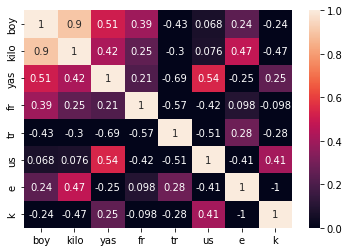

In [ ]:
sns.heatmap(modeldf.corr(),vmin=0,vmax=1,annot=True)

# Feature Engineering


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
modeldf.drop(["k"],axis=1)

,boy,kilo,yas,fr,tr,us,e
0,130,30,10,0.0,1.0,0.0,1.0
1,125,36,11,0.0,1.0,0.0,1.0
2,135,34,10,0.0,1.0,0.0,0.0
3,133,30,9,0.0,1.0,0.0,0.0
4,129,38,12,0.0,1.0,0.0,1.0
5,180,90,30,0.0,1.0,0.0,1.0
6,190,80,25,0.0,1.0,0.0,1.0
7,175,90,35,0.0,1.0,0.0,1.0
8,177,60,22,0.0,1.0,0.0,0.0
9,185,105,33,0.0,0.0,1.0,1.0


In [ ]:
X = modeldf.drop(["e"], axis=1) # determining features of dataset
y = modeldf[["e"]]
X.tail()

,boy,kilo,yas,fr,tr,us,k
17,187,80,27,1.0,0.0,0.0,0.0
18,183,88,28,1.0,0.0,0.0,0.0
19,159,40,29,1.0,0.0,0.0,1.0
20,164,66,32,1.0,0.0,0.0,1.0
21,166,56,42,1.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (15, 7)
x test:  (7, 7)
y train:  (15, 1)
y test:  (7, 1)


Normalization


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train) # fit scaler on training data
X_train_norm = scaler.transform(X_train) # transform training data
X_test_norm = scaler.transform(X_test) # transform testing data

In [ ]:
# convert np arrays to pandas dataframe
labels = X_train.columns
labels = np.hstack(labels).ravel()
X_train_norm = pd.DataFrame(X_train_norm, columns =labels)
X_test_norm = pd.DataFrame(X_test_norm, columns =labels)
X_train_norm.head()

,boy,kilo,yas,fr,tr,us,k
0,0.061538,0.106667,0.044444,0.0,1.0,0.0,0.0
1,0.153846,0.053333,0.000000,0.0,1.0,0.0,1.0
2,0.953846,0.666667,0.377778,1.0,0.0,0.0,0.0
3,1.000000,0.666667,0.333333,0.0,1.0,0.0,0.0
4,0.769231,0.800000,0.555556,0.0,1.0,0.0,0.0


Standartization

In [ ]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_train_stand.head()

,boy,kilo,yas,fr,tr,us,k
4,129,38,12,0.0,1.0,0.0,0.0
2,135,34,10,0.0,1.0,0.0,1.0
17,187,80,27,1.0,0.0,0.0,0.0
6,190,80,25,0.0,1.0,0.0,0.0
7,175,90,35,0.0,1.0,0.0,0.0


In [ ]:
# numerical features
num_cols = ["boy","kilo","yas"]

# apply standardization on non-encoded features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
X_train_stand.head()


,boy,kilo,yas,fr,tr,us,k
4,-1.516149,-1.100066,-1.243170,0.0,1.0,0.0,0.0
2,-1.237673,-1.280899,-1.394162,0.0,1.0,0.0,1.0
17,1.175789,0.798678,-0.110728,1.0,0.0,0.0,0.0
6,1.315027,0.798678,-0.261720,0.0,1.0,0.0,0.0
7,0.618836,1.250761,0.493241,0.0,1.0,0.0,0.0


In [ ]:
#xadd= pd.DataFrame(X_train.iloc[:,3:6])
#X_train_stand.join(xadd)
#X_train_stand.head()


In [ ]:
# convert np arrays to pd dataframe
#labels = X_train.columns.drop(["fr","tr","us"])
labels = X_train.columns

labels = np.hstack(labels).ravel()
X_train_stand = pd.DataFrame(X_train_stand, columns =labels)
X_test_stand = pd.DataFrame(X_test_stand, columns =labels)
X_train_stand.head()
#labels

,boy,kilo,yas,fr,tr,us,k
4,-1.516149,-1.100066,-1.243170,0.0,1.0,0.0,0.0
2,-1.237673,-1.280899,-1.394162,0.0,1.0,0.0,1.0
17,1.175789,0.798678,-0.110728,1.0,0.0,0.0,0.0
6,1.315027,0.798678,-0.261720,0.0,1.0,0.0,0.0
7,0.618836,1.250761,0.493241,0.0,1.0,0.0,0.0




```
# Bu, kod olarak biçimlendirilmiştir
```

# Model Evoluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt



In [ ]:
R2_train = []
R2_test = []
confusion = []
accuracyTrain = []
accuracyTest = []
balancedAccTest = []
F1test= []
cms = []
precisionTest= []
accuracyTOwn = []
ytest=[]
probs = []
#tns = []
#fps = []
#fns = []
#tps = []

class ModelEvaluationMetrics():
    def accuracy(self, tn, fp, fn, tp):
        return (tp + tn) / (tp + tn + fp + fn)

    def classificationError(self, tn, fp, fn, tp):  # (1 - accuracy)
        return (fp + fn) / (tp + tn + fp + fn)

    def truePositive(self, tn, fp, fn, tp):  # recall = sensitivity #
        return (tp) / (tp + fn)

    def trueNegative(self, tn, fp, fn, tp):  # specificity
        return (tn) / (tn + fp)

    def falsePositive(self, tn, fp, fn, tp):
        return (fp) / (tn + fp)

    def falseNegative(self, tn, fp, fn, tp):
        return (fn) / (tp + fn)

    def positivePredictiveValue(self, tn, fp, fn, tp):  #precision
        return (tp) / (tp + fp)

    def negativePredictiveValue(self, tn, fp, fn, tp):
        return (tn) / (tn + fn)

    def balancedAccuracy(self, tn, fp, fn, tp):
        tPos = self.truePositive(tn, fp, fn, tp)
        tNeg = self.trueNegative(tn, fp, fn, tp)
        return (tPos + tNeg) / 2

    def F1(self, tn, fp, fn, tp):
        ppv = self.positivePredictiveValue(tn, fp, fn, tp)
        tPos = self.truePositive(tn, fp, fn, tp)
        return (2 * ppv  * tPos) / (ppv + tPos)

    def plotROCcurve(self,fpr,tpr):
        plt.plot(fpr,tpr,color='orange', label='ROC')
        plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()


# defining function in order not to overwrite
def classificationModel(model,model_name):
    # raw, normalized and standardized training and testing data
    trainX = [X_train, X_train_norm, X_train_stand]
    testX = [X_test, X_test_norm, X_test_stand]
    metric = ModelEvaluationMetrics()


    for i in range(len(trainX)):
      # fit model
      model.fit(trainX[i],y_train)

      # predict traın set
      y_pred_train = model.predict(trainX[i])

      # accuracy train
      accuracyTrain.append(accuracy_score(y_train,y_pred_train))

      # predict TEST set --/-- obtain scores
      y_pred_test = model.predict(X_test)
      # --> np.savetxt('Results.txt', y_pred_test, '%.3f')  # if saving is needed
      ytest.append(y_pred_test)

      # confusion matrix for one
      cm = confusion_matrix(y_test, y_pred_test, labels=[0,1])
      #cms.append(confusion_matrix(y_test, y_pred_test, labels=[0,1]))
      cms.append(cm)
      tn, fp, fn, tp = cm.ravel()

      # F1 Test Score
      F1test.append(metric.F1(tn, fp, fn, tp))

      # balanced accuracy test
      balancedAccTest.append(metric.balancedAccuracy(tn, fp, fn, tp))

      # precision test
      precisionTest.append(metric.positivePredictiveValue(tn, fp, fn, tp))

      # accuracy
      accuracyTOwn.append(metric.accuracy(tn,fp,fn,tp))

      # R2 test score
      R2_test.append(round(r2_score(y_test,y_pred_test),3))

      # accuracy test
      accuracyTest.append(accuracy_score(y_test,y_pred_test))

      # calculate probabilities
      probs.append(model.predict_proba(testX[i])[:,1])
      auc = roc_auc_score(y_test,probs[i])
      print("AUC: %.2f" % auc)
      fpr, tpr, thresholds = roc_curve(y_test,probs[i])
      metric.plotROCcurve(fpr,tpr)

    df_main = pd.DataFrame({'R2 Train':R2_train},index=['Original','Normalized','Standardized'])
    df_main = df_main.assign(R2test = R2_test)
    df_main = df_main.assign(AccuracyTrain = accuracyTrain)
    df_main = df_main.assign(AccuracyTest = accuracyTest)
    df_main = df_main.assign(F1test = F1test)
    df_main = df_main.assign(balAccTest = balancedAccTest)
    df_main = df_main.assign(precision = precisionTest)
    df_main = df_main.assign(AccOwn = accuracyTOwn)

    #dfs.append(pd.DataFrame({'':R2_test},index=['Original','Normalized','Standardized']))
    #dfs.append(pd.DataFrame({'Accuracy Train':accuracyTrain},index=['Original','Normalized','Standardized']))
    #dfs.append(pd.DataFrame({'Accuracy Test':accuracyTest},index=['Original','Normalized','Standardized']))
    for i in range(len(cms)):
      disp = ConfusionMatrixDisplay(confusion_matrix=cms[i], display_labels=['Women','Men'])
      disp.plot()

    display(df_main)
    print("Predicted y values:{0}".format(ytest))
    print("Real y values:{0}".format(np.ravel(y_test)))








# Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC: 0.83


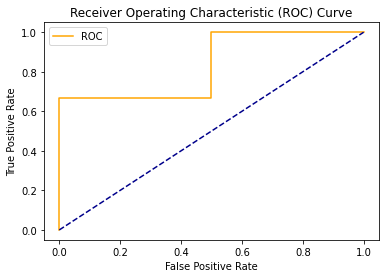

AUC: 1.00


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


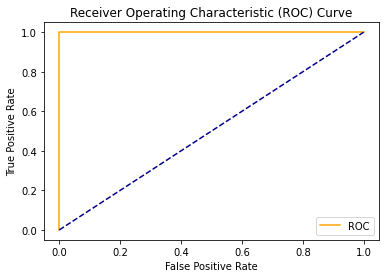

AUC: 1.00


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


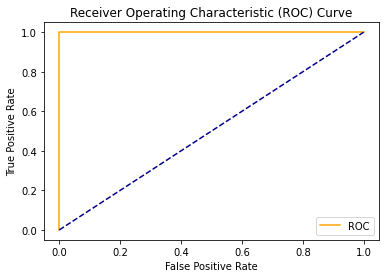

,R2 Train,R2test,AccuracyTrain,AccuracyTest,F1test,balAccTest,precision,AccOwn
Original,0.73,0.417,0.933333,0.857143,0.800000,0.833333,1.000000,0.857143
Normalized,1.00,-1.333,1.000000,0.428571,0.600000,0.500000,0.428571,0.428571
Standardized,1.00,-0.750,1.000000,0.571429,0.666667,0.625000,0.500000,0.571429


Predicted y values:[array([0., 1., 0., 0., 1., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]), array([0., 1., 1., 1., 1., 1., 1.])]
Real y values:[0. 1. 0. 0. 1. 1. 0.]


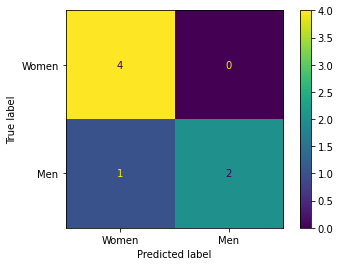

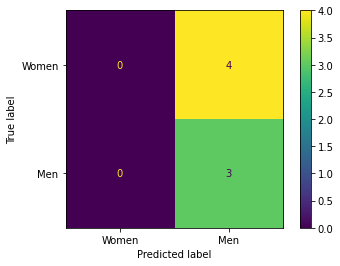

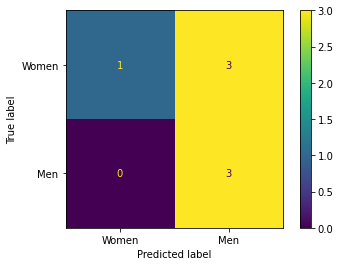

In [ ]:
logR = LogisticRegression()
classificationModel(logR,"Logistic Regression")

# KNN

Metric = Manhattan

AUC: 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


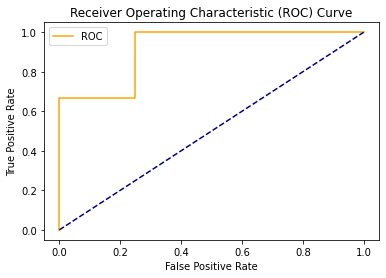

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


AUC: 0.88


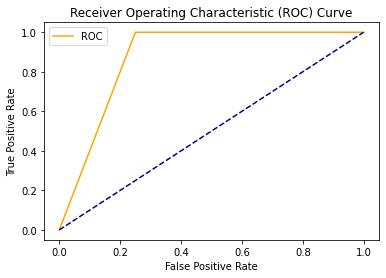

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


AUC: 0.92


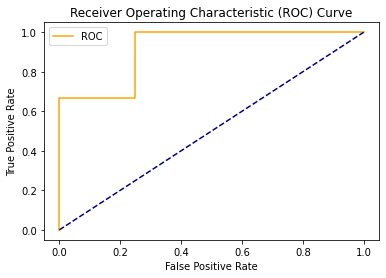

,R2 Train,R2test,AccuracyTrain,AccuracyTest,F1test,balAccTest,precision,AccOwn
Original,0.73,-0.167,0.933333,0.714286,0.666667,0.708333,0.666667,0.714286
Normalized,0.46,0.417,0.866667,0.857143,0.857143,0.875000,0.750000,0.857143
Standardized,0.46,0.417,0.866667,0.857143,0.857143,0.875000,0.750000,0.857143


Predicted y values:[array([0., 1., 1., 0., 1., 0., 0.]), array([0., 1., 1., 0., 1., 1., 0.]), array([0., 1., 1., 0., 1., 1., 0.])]
Real y values:[0. 1. 0. 0. 1. 1. 0.]


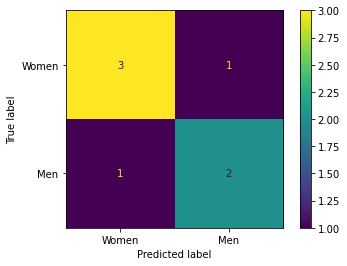

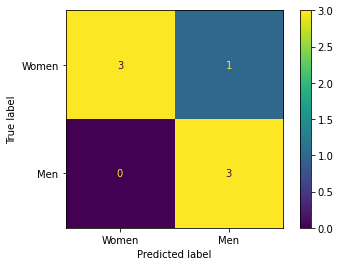

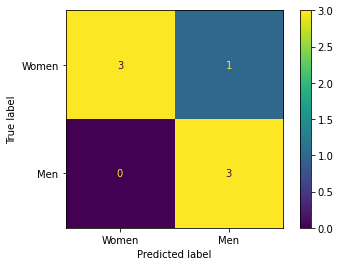

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')
# Fit the classifier to the data
classificationModel(knn,"KNN")

Metric = 'Minkowski'

AUC: 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


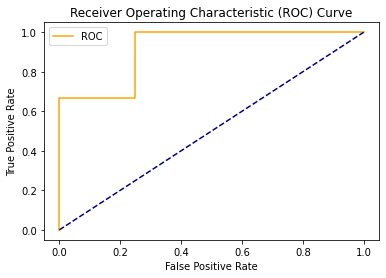

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


AUC: 0.88


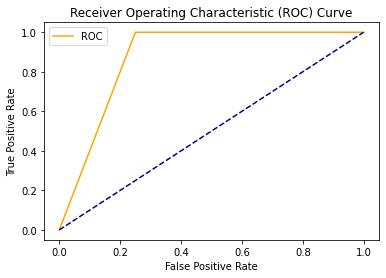

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


AUC: 0.92


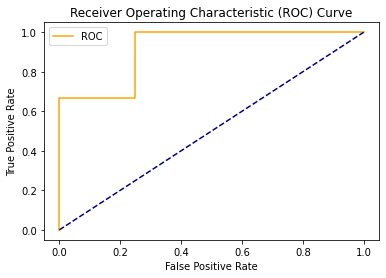

ValueError: ignored

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
# Fit the classifier to the data
classificationModel(knn,"KNN")